## Weekly activity
1. Create a **random noise color and grayscale** image. You can set your own width and height, but keep the total number of pixels of both images identical.
2. Convert the code chunk found under section <a href="#Section1">Divide an image into smaller patches using cropping</a> into a function with the following signature:
```python
crop_grid(img, num_horizontal_grid, num_vertical_grid, line_color)
 # img is the source image
 # num_horizontal_grid and num_vertical_grid are the number of patches along x and y axes.
 # line_color is the color of the grid line.
 # The output of the function should be image with grids
```
3. How would you *change the brightness* of a **color image**? Suggest **two ways** to perform the image processing operations. Implement your methods by providing the example codes. You are free to choose any image.
4. Provide at least one common use cases for the following color spaces:
    - RGB
    - HSV
    - CIELAB

## Question 1


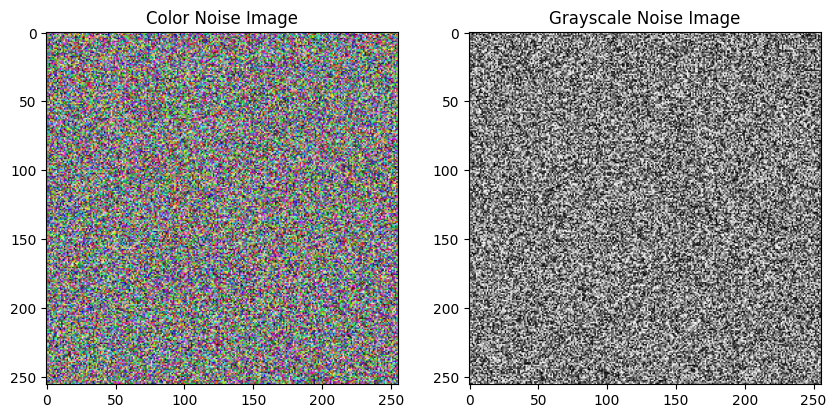

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Set dimensions
width, height = 256, 256

# Create a random color noise image
color_noise_image = np.random.randint(0, 256, (height, width, 3), dtype=np.uint8)

# Create a random grayscale noise image
grayscale_noise_image = np.random.randint(0, 256, (height, width), dtype=np.uint8)

# Display the images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Color Noise Image')
plt.imshow(color_noise_image)

plt.subplot(1, 2, 2)
plt.title('Grayscale Noise Image')
plt.imshow(grayscale_noise_image, cmap='gray')

plt.show()

## Question 2


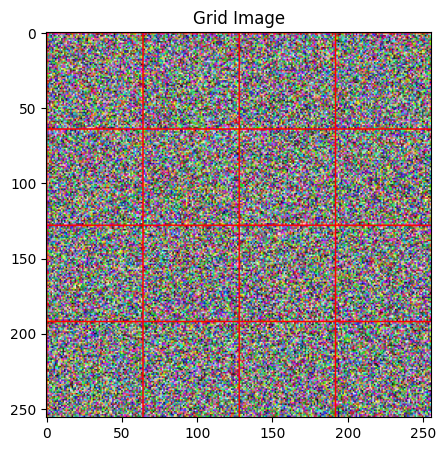

In [4]:
def crop_grid(img, num_horizontal_grid, num_vertical_grid, line_color=(0, 255, 0)):
    """
    Crop the given image into smaller patches with grid lines.
    
    Parameters:
    img: numpy array
        Source image.
    num_horizontal_grid: int
        Number of patches along x axis.
    num_vertical_grid: int
        Number of patches along y axis.
    line_color: tuple
        Color of the grid lines.
    
    Returns:
    numpy array
        Image with grid lines.
    """
    h, w = img.shape[:2]
    x_step = w // num_horizontal_grid
    y_step = h // num_vertical_grid
    
    # Draw horizontal lines
    for y in range(0, h, y_step):
        cv2.line(img, (0, y), (w, y), line_color, 1)
    
    # Draw vertical lines
    for x in range(0, w, x_step):
        cv2.line(img, (x, 0), (x, h), line_color, 1)
    
    return img

# Example usage
grid_image = crop_grid(color_noise_image.copy(), 4, 4, (255, 0, 0))

plt.figure(figsize=(5, 5))
plt.title('Grid Image')
plt.imshow(grid_image)
plt.show()

## Question 3


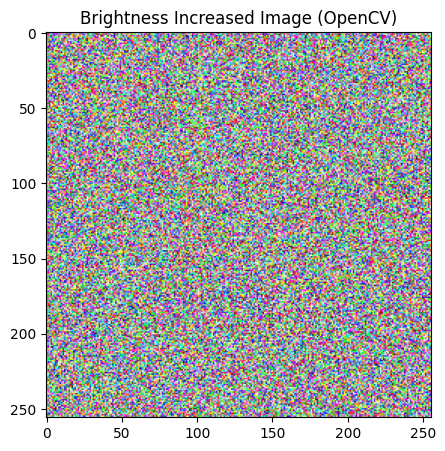

In [5]:
def change_brightness_opencv(image, value):
    """
    Change the brightness of an image using OpenCV.
    
    Parameters:
    image: numpy array
        Source image.
    value: int
        Value to adjust brightness. Positive to increase, negative to decrease.
    
    Returns:
    numpy array
        Brightness adjusted image.
    """
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)
    v = cv2.add(v, value)
    v = np.clip(v, 0, 255)
    final_hsv = cv2.merge((h, s, v))
    bright_image = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
    return bright_image

# Example usage
bright_image_opencv = change_brightness_opencv(color_noise_image.copy(), 50)

plt.figure(figsize=(5, 5))
plt.title('Brightness Increased Image (OpenCV)')
plt.imshow(bright_image_opencv)
plt.show()

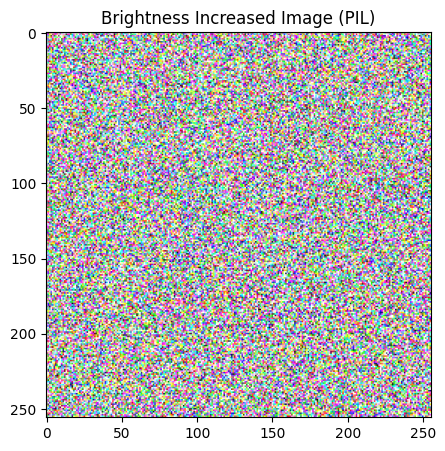

In [6]:
from PIL import Image, ImageEnhance

def change_brightness_pil(image, factor):
    """
    Change the brightness of an image using PIL.
    
    Parameters:
    image: PIL.Image.Image
        Source image.
    factor: float
        Factor to adjust brightness. 1.0 means no change, less than 1.0 decreases, greater than 1.0 increases.
    
    Returns:
    PIL.Image.Image
        Brightness adjusted image.
    """
    enhancer = ImageEnhance.Brightness(image)
    bright_image = enhancer.enhance(factor)
    return bright_image

# Convert the OpenCV image to PIL image
color_noise_image_pil = Image.fromarray(cv2.cvtColor(color_noise_image, cv2.COLOR_BGR2RGB))

# Example usage
bright_image_pil = change_brightness_pil(color_noise_image_pil, 1.5)

plt.figure(figsize=(5, 5))
plt.title('Brightness Increased Image (PIL)')
plt.imshow(bright_image_pil)
plt.show()

## Question 4


RGB:

Use Case: Digital screens (monitors, TVs, smartphones)

HSV:

Use Case: Image segmentation, color-based object detection

CIELAB:

Use Case: Color correction and color difference measurement